In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Shipun Meher\Downloads\stroke prediction.csv")

Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [3]:
import warnings

warnings.filterwarnings("ignore")

# DATA EXPLORATION & DATA UNDERSTANDING

In [4]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [6]:
df.shape

(43400, 12)

In [7]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
df["id"].nunique()

43400

In [9]:
df["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [10]:
df["gender"].value_counts()

gender
Female    25665
Male      17724
Other        11
Name: count, dtype: int64

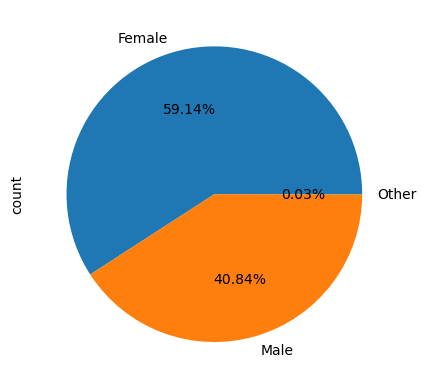

In [11]:
df["gender"].value_counts().plot(kind="pie",autopct="%0.2f%%")
plt.show()

In [12]:
df["age"].describe()

count    43400.000000
mean        42.217894
std         22.519649
min          0.080000
25%         24.000000
50%         44.000000
75%         60.000000
max         82.000000
Name: age, dtype: float64

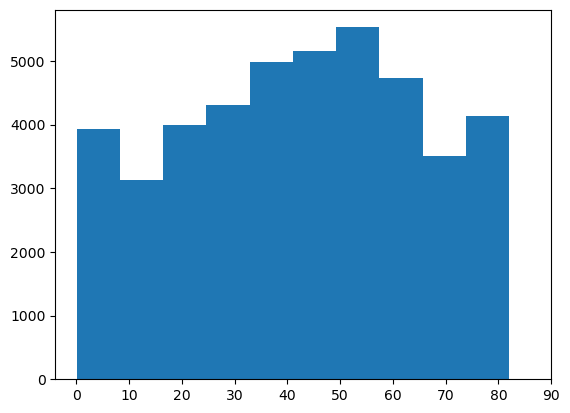

In [13]:
plt.hist(df["age"],bins=10)
plt.xticks(list(range(0,100,10)))
plt.show()

In [14]:
df["hypertension"].unique()

array([0, 1], dtype=int64)

In [15]:
df["hypertension"].value_counts()

hypertension
0    39339
1     4061
Name: count, dtype: int64

<Axes: xlabel='hypertension'>

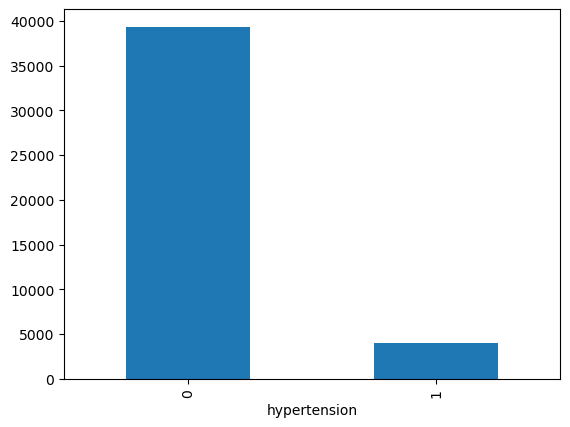

In [16]:
df["hypertension"].value_counts().plot(kind="bar")

In [17]:
df["heart_disease"].unique()

array([0, 1], dtype=int64)

In [18]:
df["heart_disease"].value_counts()

heart_disease
0    41338
1     2062
Name: count, dtype: int64

<Axes: ylabel='heart_disease'>

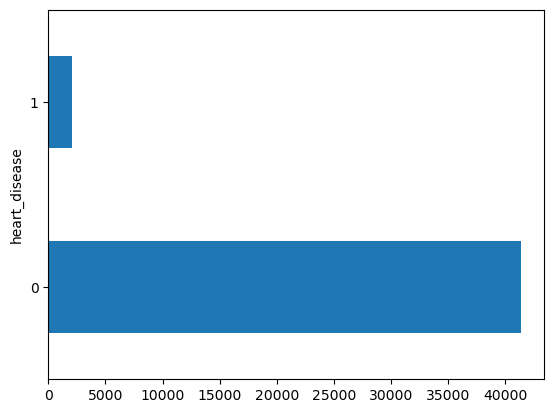

In [19]:
df["heart_disease"].value_counts().plot(kind="barh")

In [20]:
df["ever_married"].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
df["ever_married"].value_counts()

ever_married
Yes    27938
No     15462
Name: count, dtype: int64

<Axes: xlabel='ever_married'>

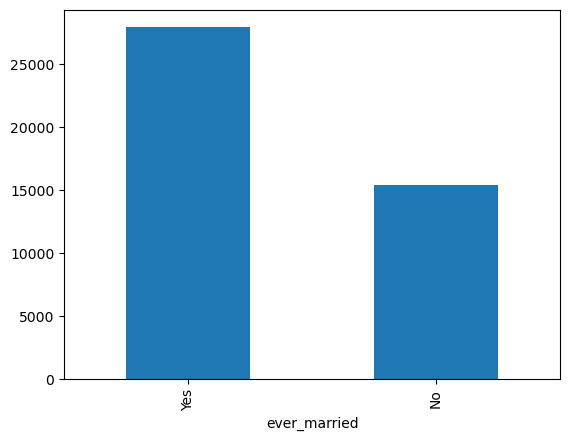

In [22]:
df["ever_married"].value_counts().plot(kind="bar")

In [23]:
df["work_type"].unique()

array(['children', 'Private', 'Never_worked', 'Self-employed', 'Govt_job'],
      dtype=object)

In [24]:
df["work_type"].value_counts()

work_type
Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: count, dtype: int64

<Axes: ylabel='count'>

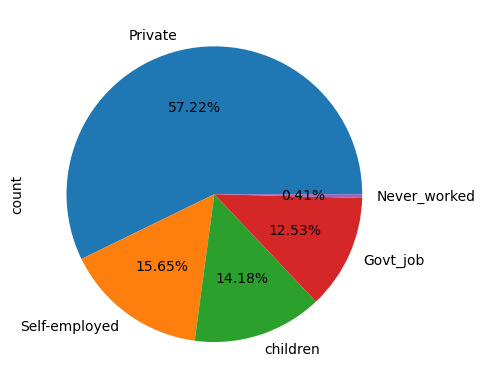

In [25]:
df["work_type"].value_counts().plot(kind="pie",autopct="%0.2f%%")

In [26]:
df["Residence_type"].unique()

array(['Rural', 'Urban'], dtype=object)

In [27]:
df["Residence_type"].value_counts()

Residence_type
Urban    21756
Rural    21644
Name: count, dtype: int64

<Axes: ylabel='count'>

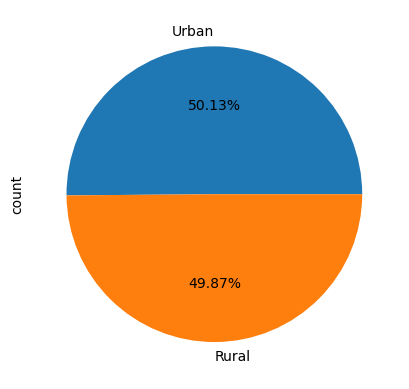

In [28]:
df["Residence_type"].value_counts().plot(kind="pie",autopct="%0.2f%%")

In [29]:
df["avg_glucose_level"].describe()

count    43400.000000
mean       104.482750
std         43.111751
min         55.000000
25%         77.540000
50%         91.580000
75%        112.070000
max        291.050000
Name: avg_glucose_level, dtype: float64

In [30]:
df["bmi"].describe()

count    41938.000000
mean        28.605038
std          7.770020
min         10.100000
25%         23.200000
50%         27.700000
75%         32.900000
max         97.600000
Name: bmi, dtype: float64

In [31]:
df["smoking_status"].unique()

array([nan, 'never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [32]:
df["smoking_status"].value_counts()

smoking_status
never smoked       16053
formerly smoked     7493
smokes              6562
Name: count, dtype: int64

<Axes: ylabel='smoking_status'>

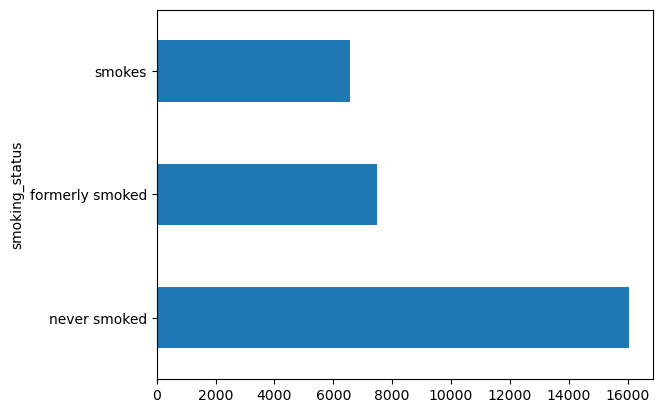

In [33]:
df["smoking_status"].value_counts().plot(kind="barh")

In [34]:
df["stroke"].unique()

array([0, 1], dtype=int64)

In [35]:
df["stroke"].value_counts()

stroke
0    42617
1      783
Name: count, dtype: int64

<Axes: xlabel='stroke'>

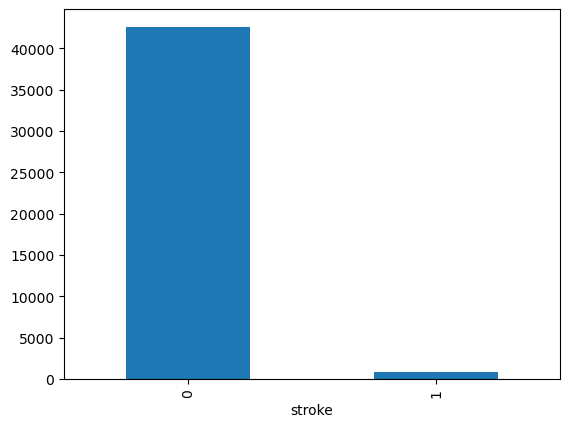

In [36]:
df["stroke"].value_counts().plot(kind="bar")

# DATA CLEANING

In [37]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [38]:
df["hypertension"].unique()

array([0, 1], dtype=int64)

In [39]:
df["hypertension"]=df["hypertension"].replace({0:"no_hypertension" , 1:"hypertension"})
df["heart_disease"]=df["heart_disease"].replace({0:"No" , 1:"Yes"})
df["stroke"]=df["stroke"].replace({0:"No" , 1:"Yes"})


In [40]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,no_hypertension,No,No,children,Rural,95.12,18.0,NaN,No
1,30468,Male,58.0,hypertension,No,Yes,Private,Urban,87.96,39.2,never smoked,No
2,16523,Female,8.0,no_hypertension,No,No,Private,Urban,110.89,17.6,NaN,No
3,56543,Female,70.0,no_hypertension,No,Yes,Private,Rural,69.04,35.9,formerly smoked,No
4,46136,Male,14.0,no_hypertension,No,No,Never_worked,Rural,161.28,19.1,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,no_hypertension,No,No,children,Urban,58.64,20.4,never smoked,No
43396,5450,Female,56.0,no_hypertension,No,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,No
43397,28375,Female,82.0,hypertension,No,Yes,Private,Urban,91.94,28.9,formerly smoked,No
43398,27973,Male,40.0,no_hypertension,No,Yes,Private,Urban,99.16,33.2,never smoked,No


In [41]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [42]:
bmi_median=df["bmi"].median()
df["bmi"]=df["bmi"].fillna(bmi_median)

In [43]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
dtype: int64

In [44]:
df=df.drop("id",axis=1)

In [45]:
categorical_columns=df.select_dtypes(include=['object']).columns
numerical_columns =df.select_dtypes(include=np.number).columns.tolist()
print("Categorial")
print(categorical_columns)
print("Numerical")
print(numerical_columns)

Categorial
Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status', 'stroke'],
      dtype='object')
Numerical
['age', 'avg_glucose_level', 'bmi']


In [46]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,no_hypertension,No,No,children,Rural,95.12,18.0,NaN,No
1,Male,58.0,hypertension,No,Yes,Private,Urban,87.96,39.2,never smoked,No
2,Female,8.0,no_hypertension,No,No,Private,Urban,110.89,17.6,NaN,No
3,Female,70.0,no_hypertension,No,Yes,Private,Rural,69.04,35.9,formerly smoked,No
4,Male,14.0,no_hypertension,No,No,Never_worked,Rural,161.28,19.1,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,no_hypertension,No,No,children,Urban,58.64,20.4,never smoked,No
43396,Female,56.0,no_hypertension,No,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,No
43397,Female,82.0,hypertension,No,Yes,Private,Urban,91.94,28.9,formerly smoked,No
43398,Male,40.0,no_hypertension,No,Yes,Private,Urban,99.16,33.2,never smoked,No


# ANALYSIS

# Gender Distribution

<Axes: ylabel='count'>

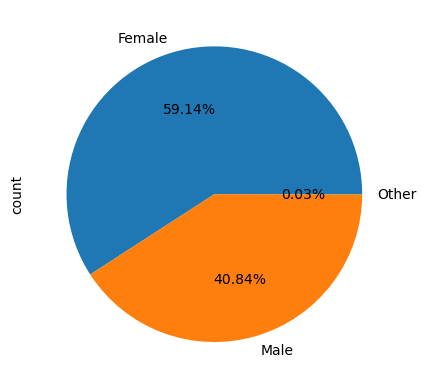

In [47]:
df["gender"].value_counts().plot(kind="pie",autopct="%0.2f%%")

# Age Distribution

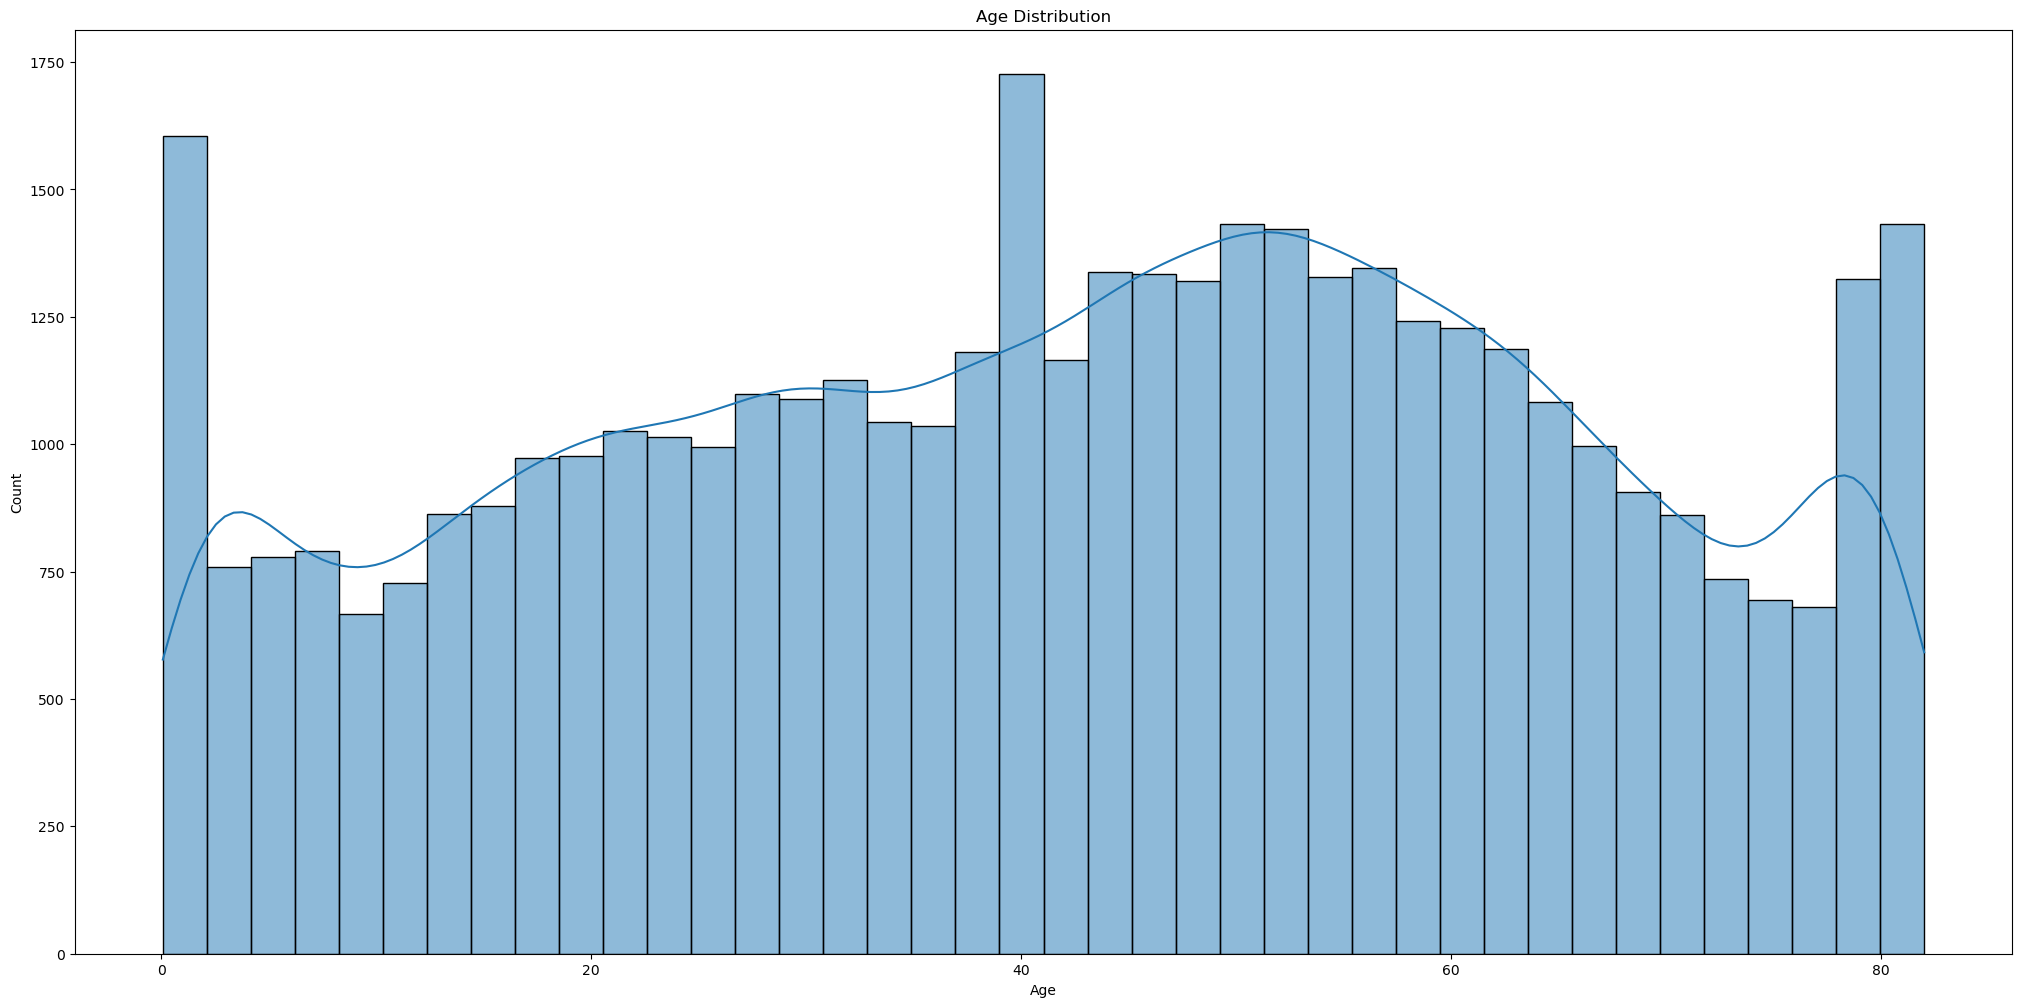

In [48]:
plt.figure(figsize=(25,12))
sns.histplot(df["age"],kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

# Hypertension Distribution

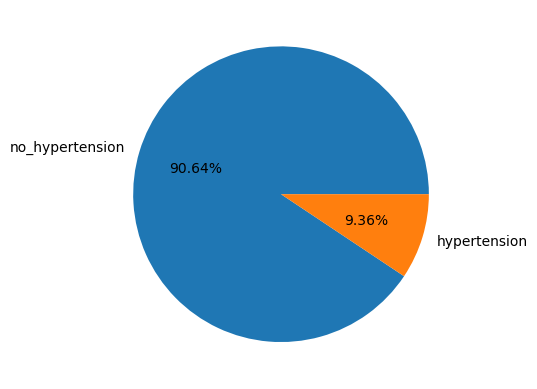

In [49]:
plt.pie(df["hypertension"].value_counts(),
        labels=df["hypertension"].value_counts().index.tolist(),autopct="%0.2f%%")

plt.show()

# Work-type Distribution

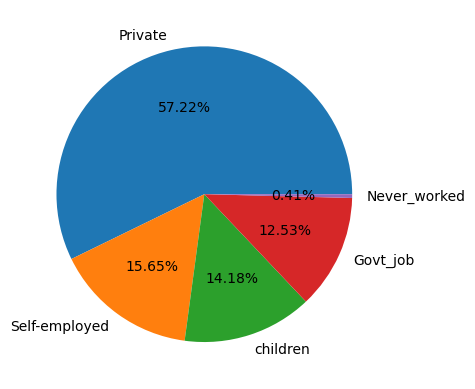

In [50]:
plt.pie(df["work_type"].value_counts(),
        labels=df["work_type"].value_counts().index.tolist(),autopct="%0.2f%%")
plt.show()

# Distribution of Avg_glucose_level

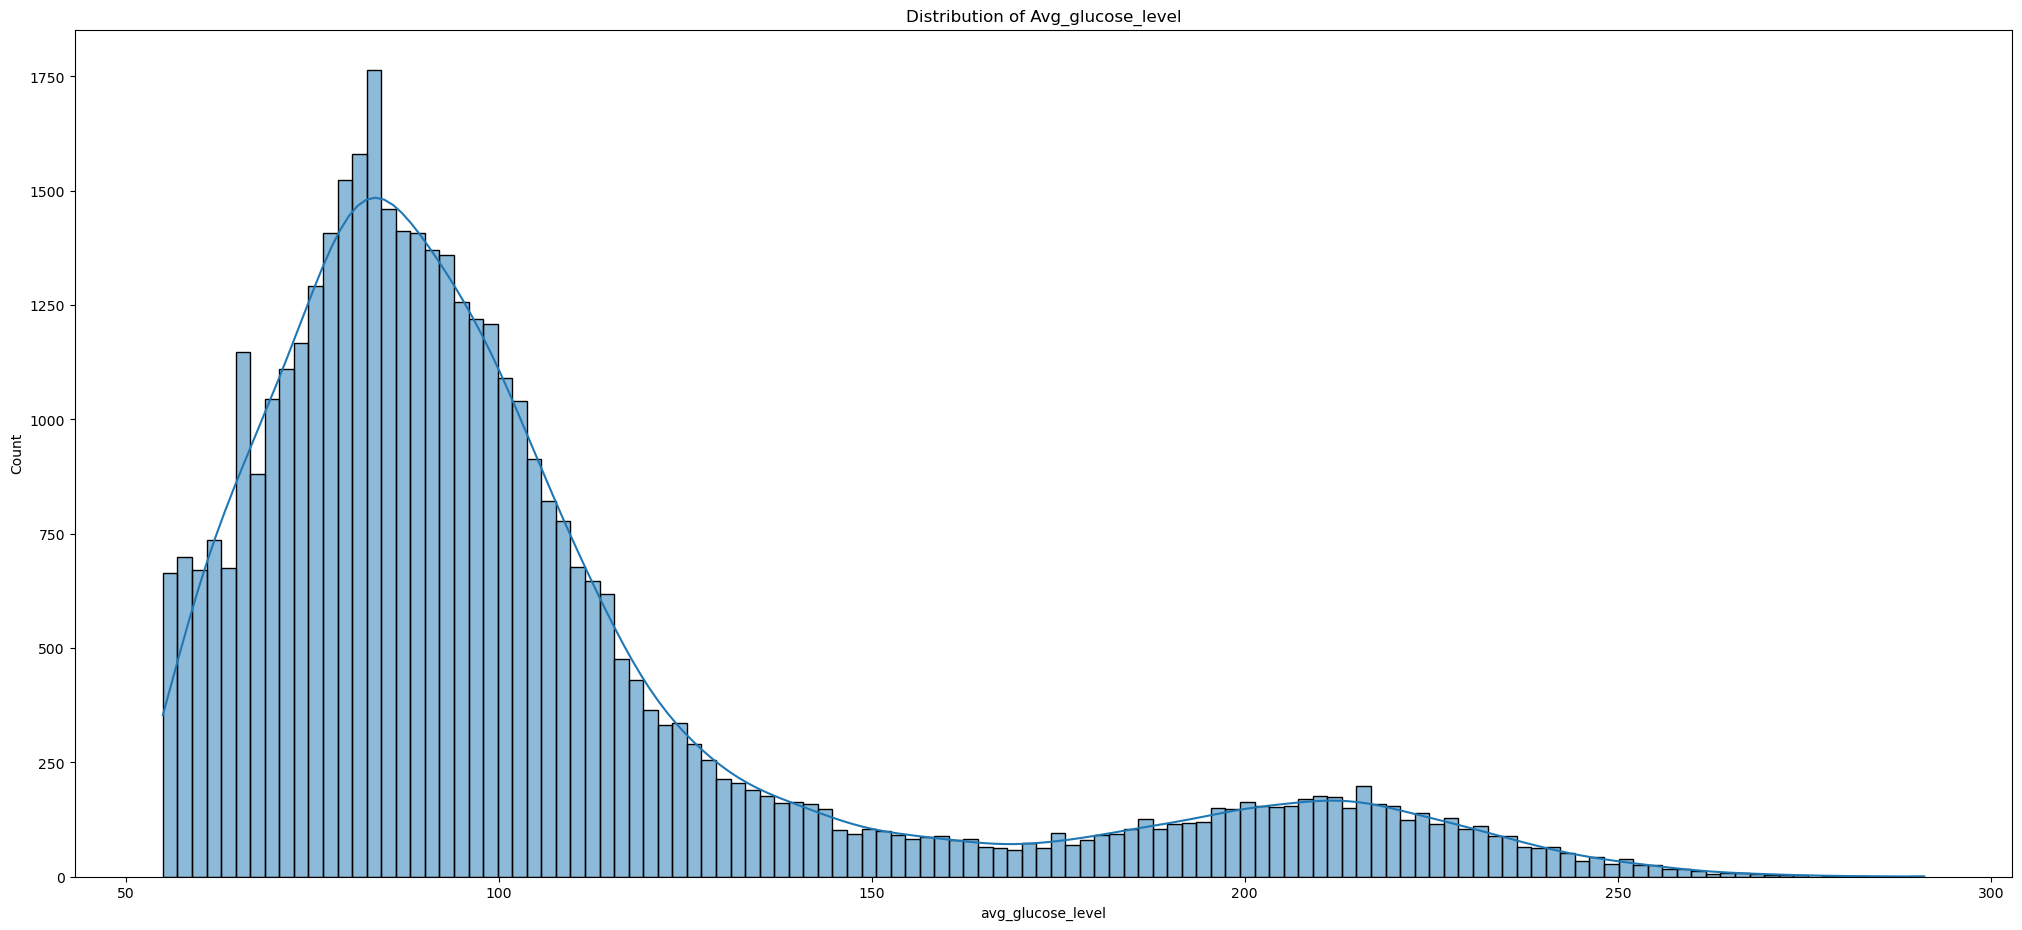

In [51]:
plt.figure(figsize=(25,11))
sns.histplot(df["avg_glucose_level"],kde=True)
plt.title("Distribution of Avg_glucose_level")
plt.show()

# Distribution of BMI

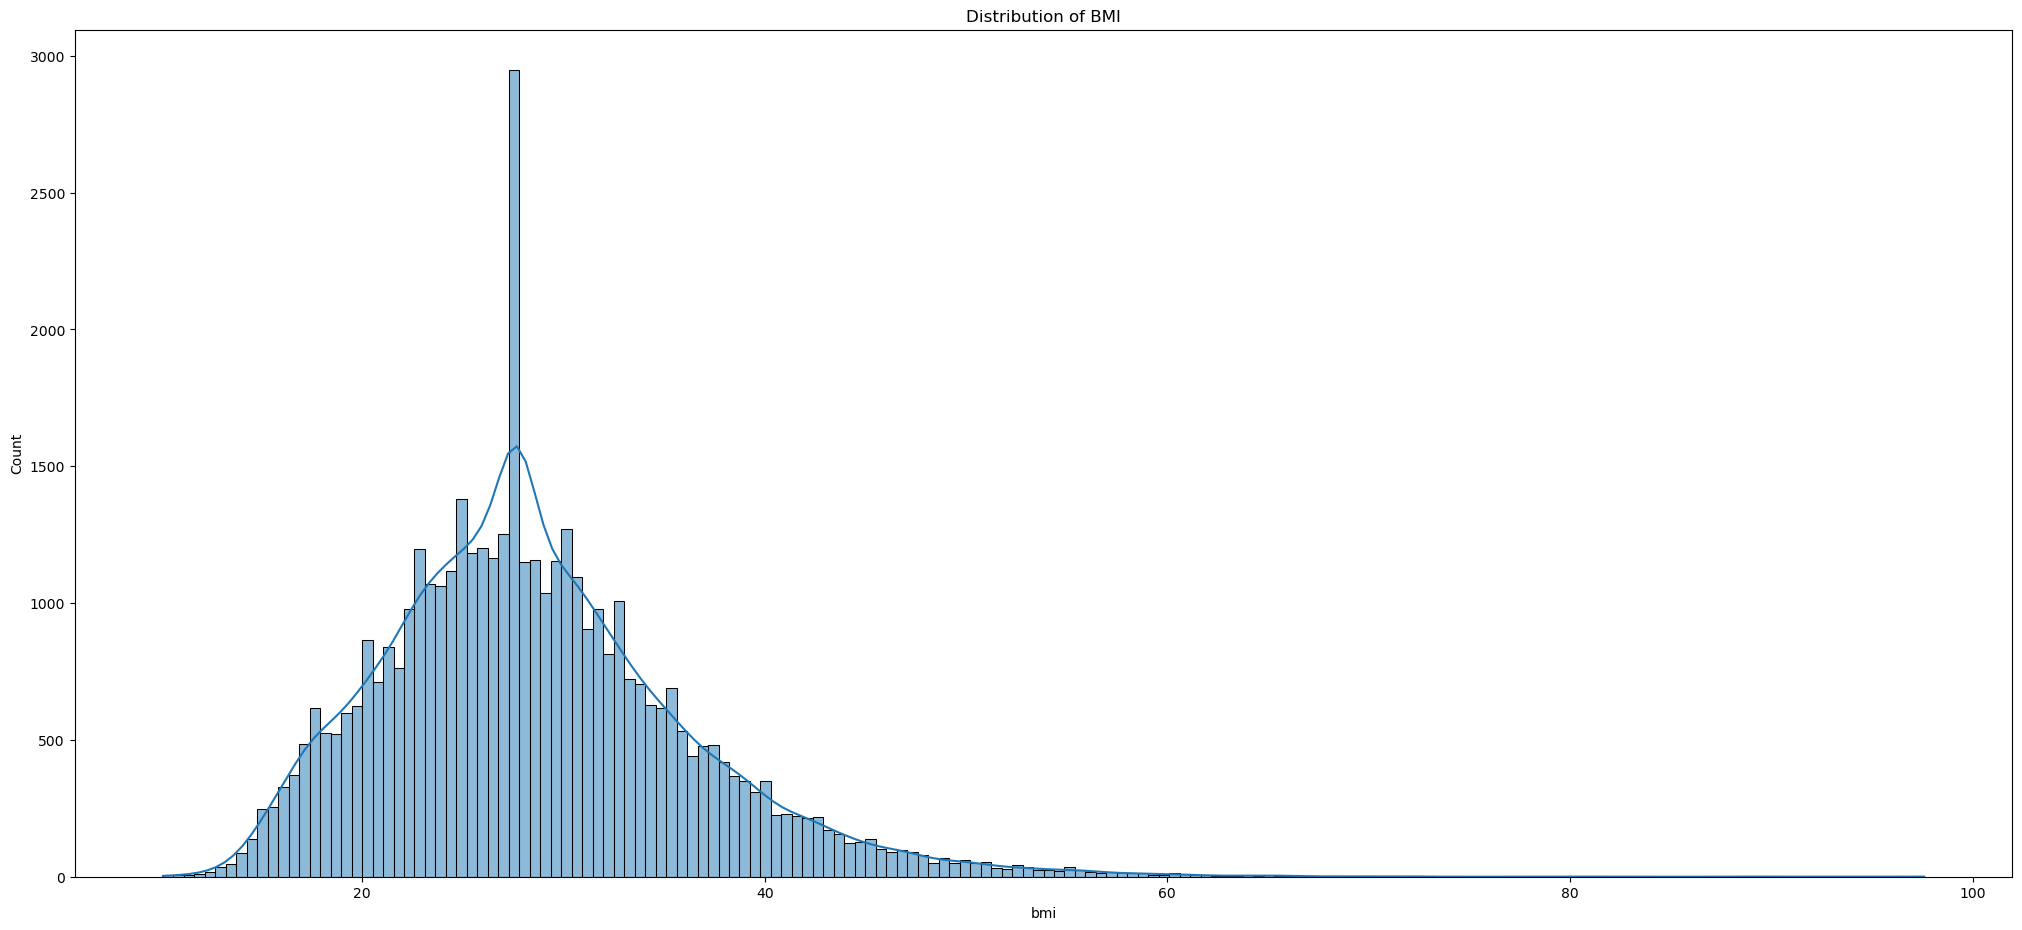

In [52]:
plt.figure(figsize=(25,11))
sns.histplot(df["bmi"],kde=True)
plt.title("Distribution of BMI")
plt.show()

# # Distribution of Heart disease

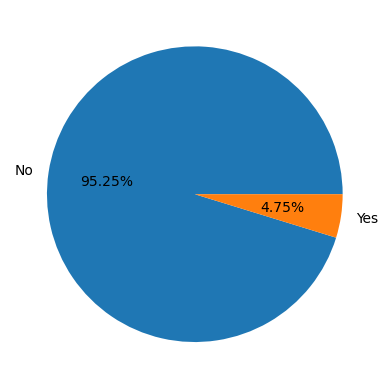

In [53]:
plt.pie(df["heart_disease"].value_counts(),
        labels=df["heart_disease"].value_counts().index.tolist(),autopct="%0.2f%%")
plt.show()

 # Distribution of Smoking_status

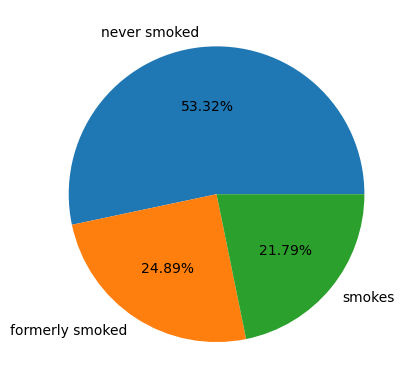

In [54]:
plt.pie(df["smoking_status"].value_counts(),
        labels=df["smoking_status"].value_counts().index.tolist(),autopct="%0.2f%%")
plt.show()

# Distribution of Stroke

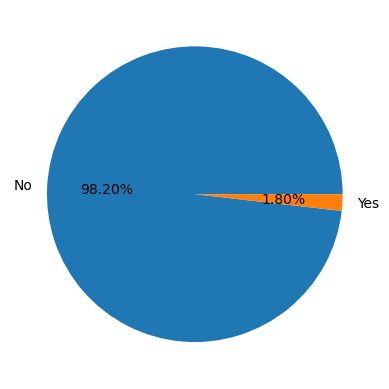

In [55]:
plt.pie(df["stroke"].value_counts(),
        labels=df["stroke"].value_counts().index.tolist(),autopct="%0.2f%%")
plt.show()

In [56]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,no_hypertension,No,No,children,Rural,95.12,18.0,NaN,No
1,Male,58.0,hypertension,No,Yes,Private,Urban,87.96,39.2,never smoked,No
2,Female,8.0,no_hypertension,No,No,Private,Urban,110.89,17.6,NaN,No
3,Female,70.0,no_hypertension,No,Yes,Private,Rural,69.04,35.9,formerly smoked,No
4,Male,14.0,no_hypertension,No,No,Never_worked,Rural,161.28,19.1,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,no_hypertension,No,No,children,Urban,58.64,20.4,never smoked,No
43396,Female,56.0,no_hypertension,No,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,No
43397,Female,82.0,hypertension,No,Yes,Private,Urban,91.94,28.9,formerly smoked,No
43398,Male,40.0,no_hypertension,No,Yes,Private,Urban,99.16,33.2,never smoked,No


# Incidence of stroke vary by age group

In [57]:
stroke=df[df["stroke"] == "Yes"] 

In [58]:
stroke.groupby("stroke")["age"].value_counts()

stroke  age  
Yes     79.00    70
        78.00    57
        80.00    49
        81.00    43
        82.00    36
        70.00    25
        74.00    24
        76.00    24
        77.00    24
        67.00    23
        75.00    23
        72.00    21
        59.00    20
        68.00    20
        69.00    20
        57.00    19
        71.00    19
        63.00    18
        65.00    18
        66.00    17
        58.00    16
        73.00    15
        51.00    13
        60.00    13
        61.00    13
        54.00    12
        56.00    12
        62.00    12
        45.00    10
        50.00     9
        52.00     9
        48.00     8
        53.00     8
        64.00     8
        55.00     7
        39.00     5
        46.00     5
        47.00     5
        38.00     4
        42.00     4
        43.00     4
        37.00     3
        49.00     3
        34.00     2
        35.00     2
        36.00     2
        1.32      1
        14.00     1
        21.00     1
      

<Axes: xlabel='age', ylabel='Count'>

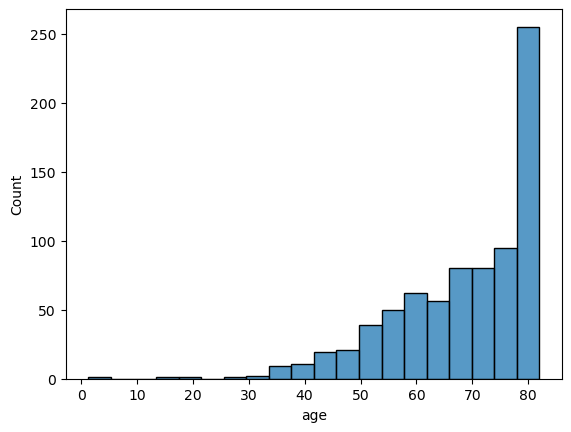

In [59]:
sns.histplot(stroke["age"])

# Conclusion: Old age people are having more stroke

# --stroke rates between genders

In [60]:
pd.crosstab(df["gender"],df["stroke"])

stroke,No,Yes
gender,,
Female,25234,431
Male,17372,352
Other,11,0


<Axes: xlabel='gender'>

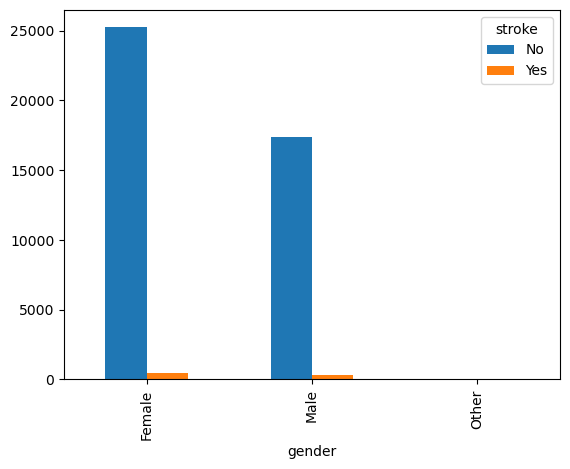

In [61]:
pd.crosstab(df["gender"],df["stroke"]).plot(kind="bar")

# Conclusion: There are no any differences in stroke rates between genders.

# --having hypertension impact on stroke or not?

In [62]:
pd.crosstab(df["hypertension"],df["stroke"],margins=True)

stroke,No,Yes,All
hypertension,,,
hypertension,3861,200,4061
no_hypertension,38756,583,39339
All,42617,783,43400


<Axes: ylabel='hypertension'>

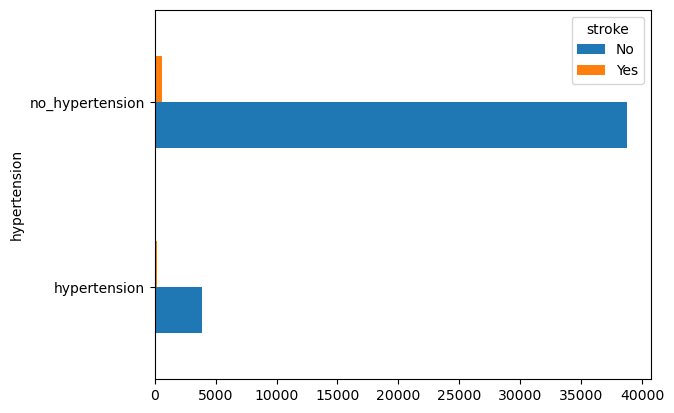

In [63]:
pd.crosstab(df["hypertension"],df["stroke"]).plot(kind="barh")

Hypertension :
Total: 4061 where Stroke (Yes): 200
  so,Stroke Rate:=4.92%

No_Hypertension : 
Total: 39339 where Stroke (Yes): 583
  so,Stroke Rate:= 1.48%

# Conclusion : With hypertension have higher stroke rate as compared to without hypertension.

# --Stroke risk for individuals with heart disease.

In [64]:
pd.crosstab(df["heart_disease"],df["stroke"],margins=True)

stroke,No,Yes,All
heart_disease,,,
No,40732,606,41338
Yes,1885,177,2062
All,42617,783,43400


array([<Axes: ylabel='No'>, <Axes: ylabel='Yes'>], dtype=object)

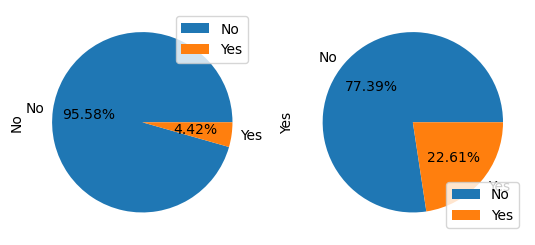

In [65]:
pd.crosstab(df["heart_disease"],df["stroke"]).plot(kind="pie",autopct="%0.2f%%",subplots=True)

# Conclusion : With having heart disease have a higher stroke rate as compared to without heart disease.

# --Smoking status with stroke incidence

In [66]:
pd.crosstab(df["smoking_status"],df["stroke"],margins=True)

stroke,No,Yes,All
smoking_status,,,
formerly smoked,7272,221,7493
never smoked,15769,284,16053
smokes,6429,133,6562
All,29470,638,30108


array([<Axes: ylabel='No'>, <Axes: ylabel='Yes'>], dtype=object)

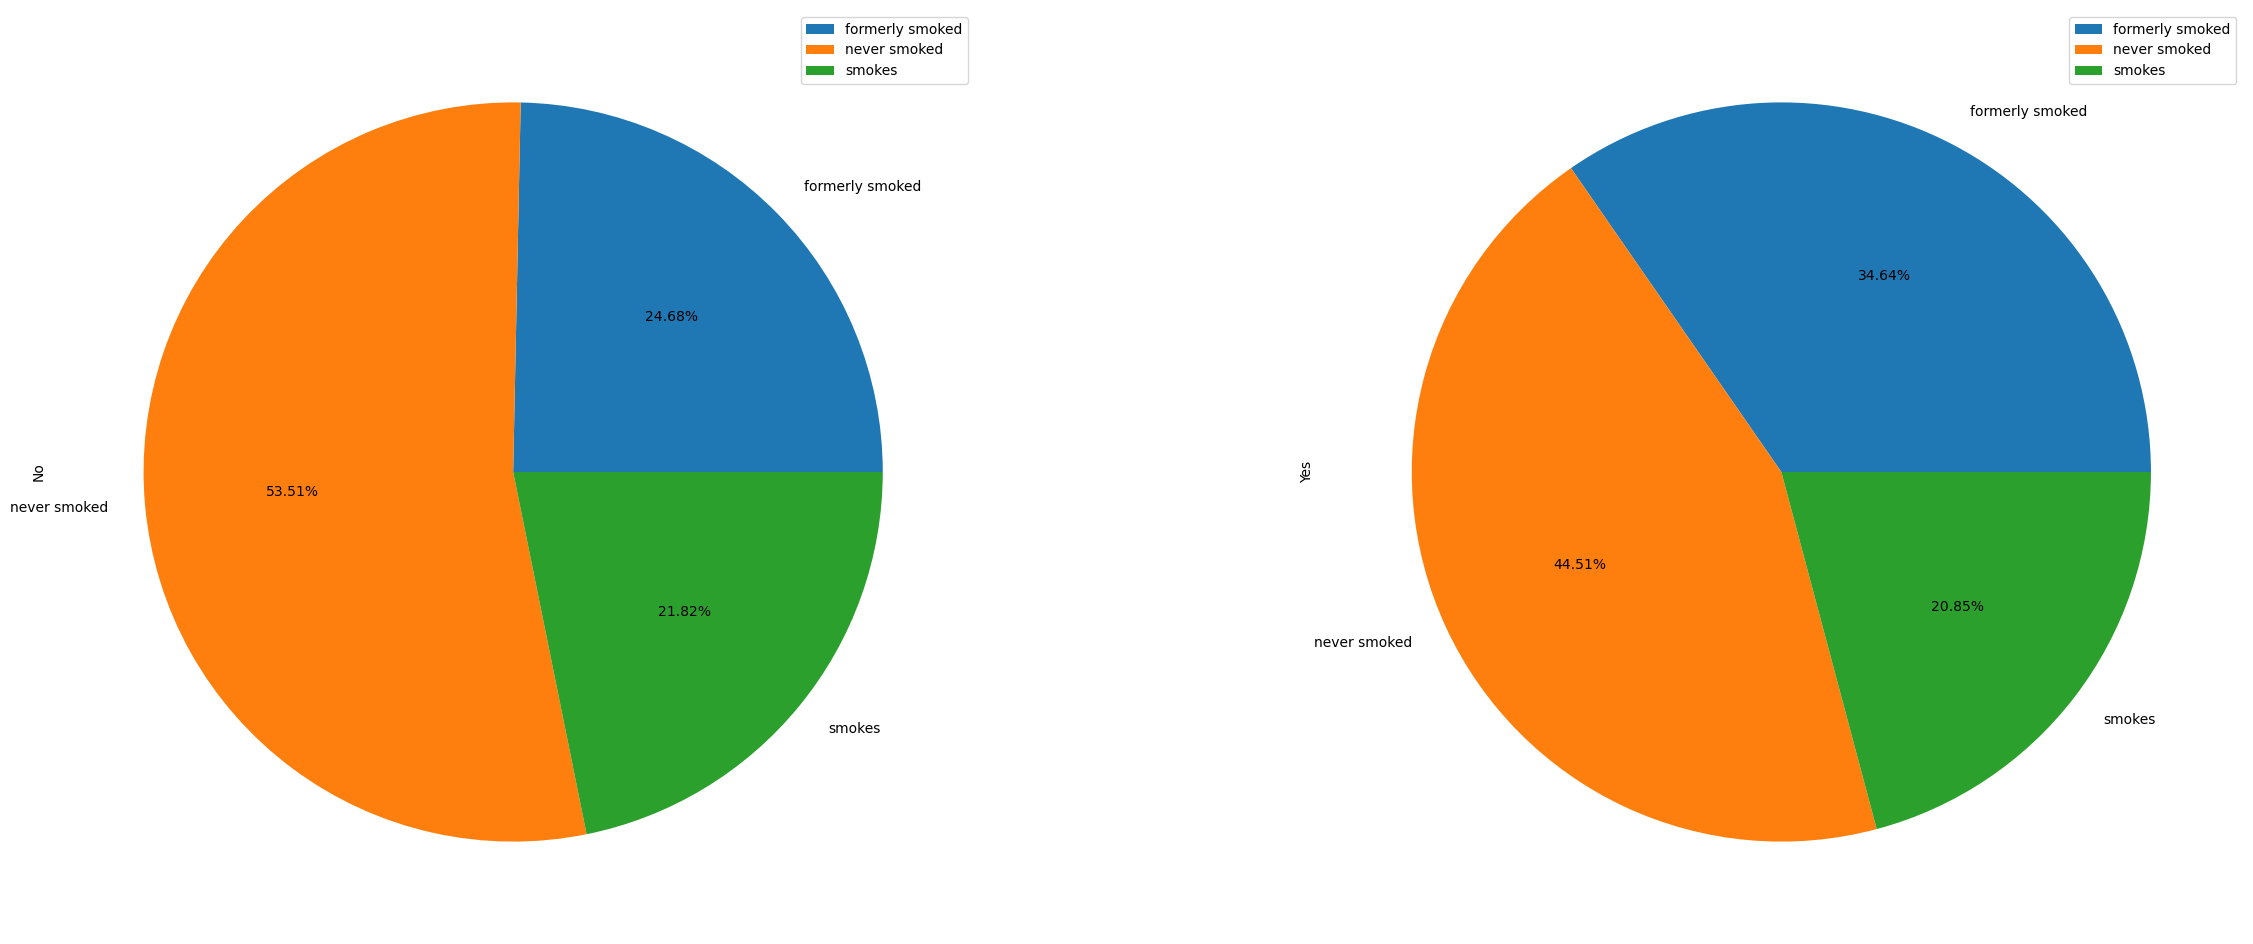

In [67]:
pd.crosstab(df["smoking_status"],df["stroke"]).plot(kind="pie",autopct="%0.2f%%",subplots=True,figsize=(30,12))

# Conclusion:The data suggests that smoking status influences stroke risk

# --

In [68]:
df.groupby("stroke")["avg_glucose_level"].describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
No,42617.0,104.021590,42.608788,55.00,77.50,91.47,111.67,291.05
Yes,783.0,129.582669,59.734073,55.01,80.99,104.47,192.36,271.74


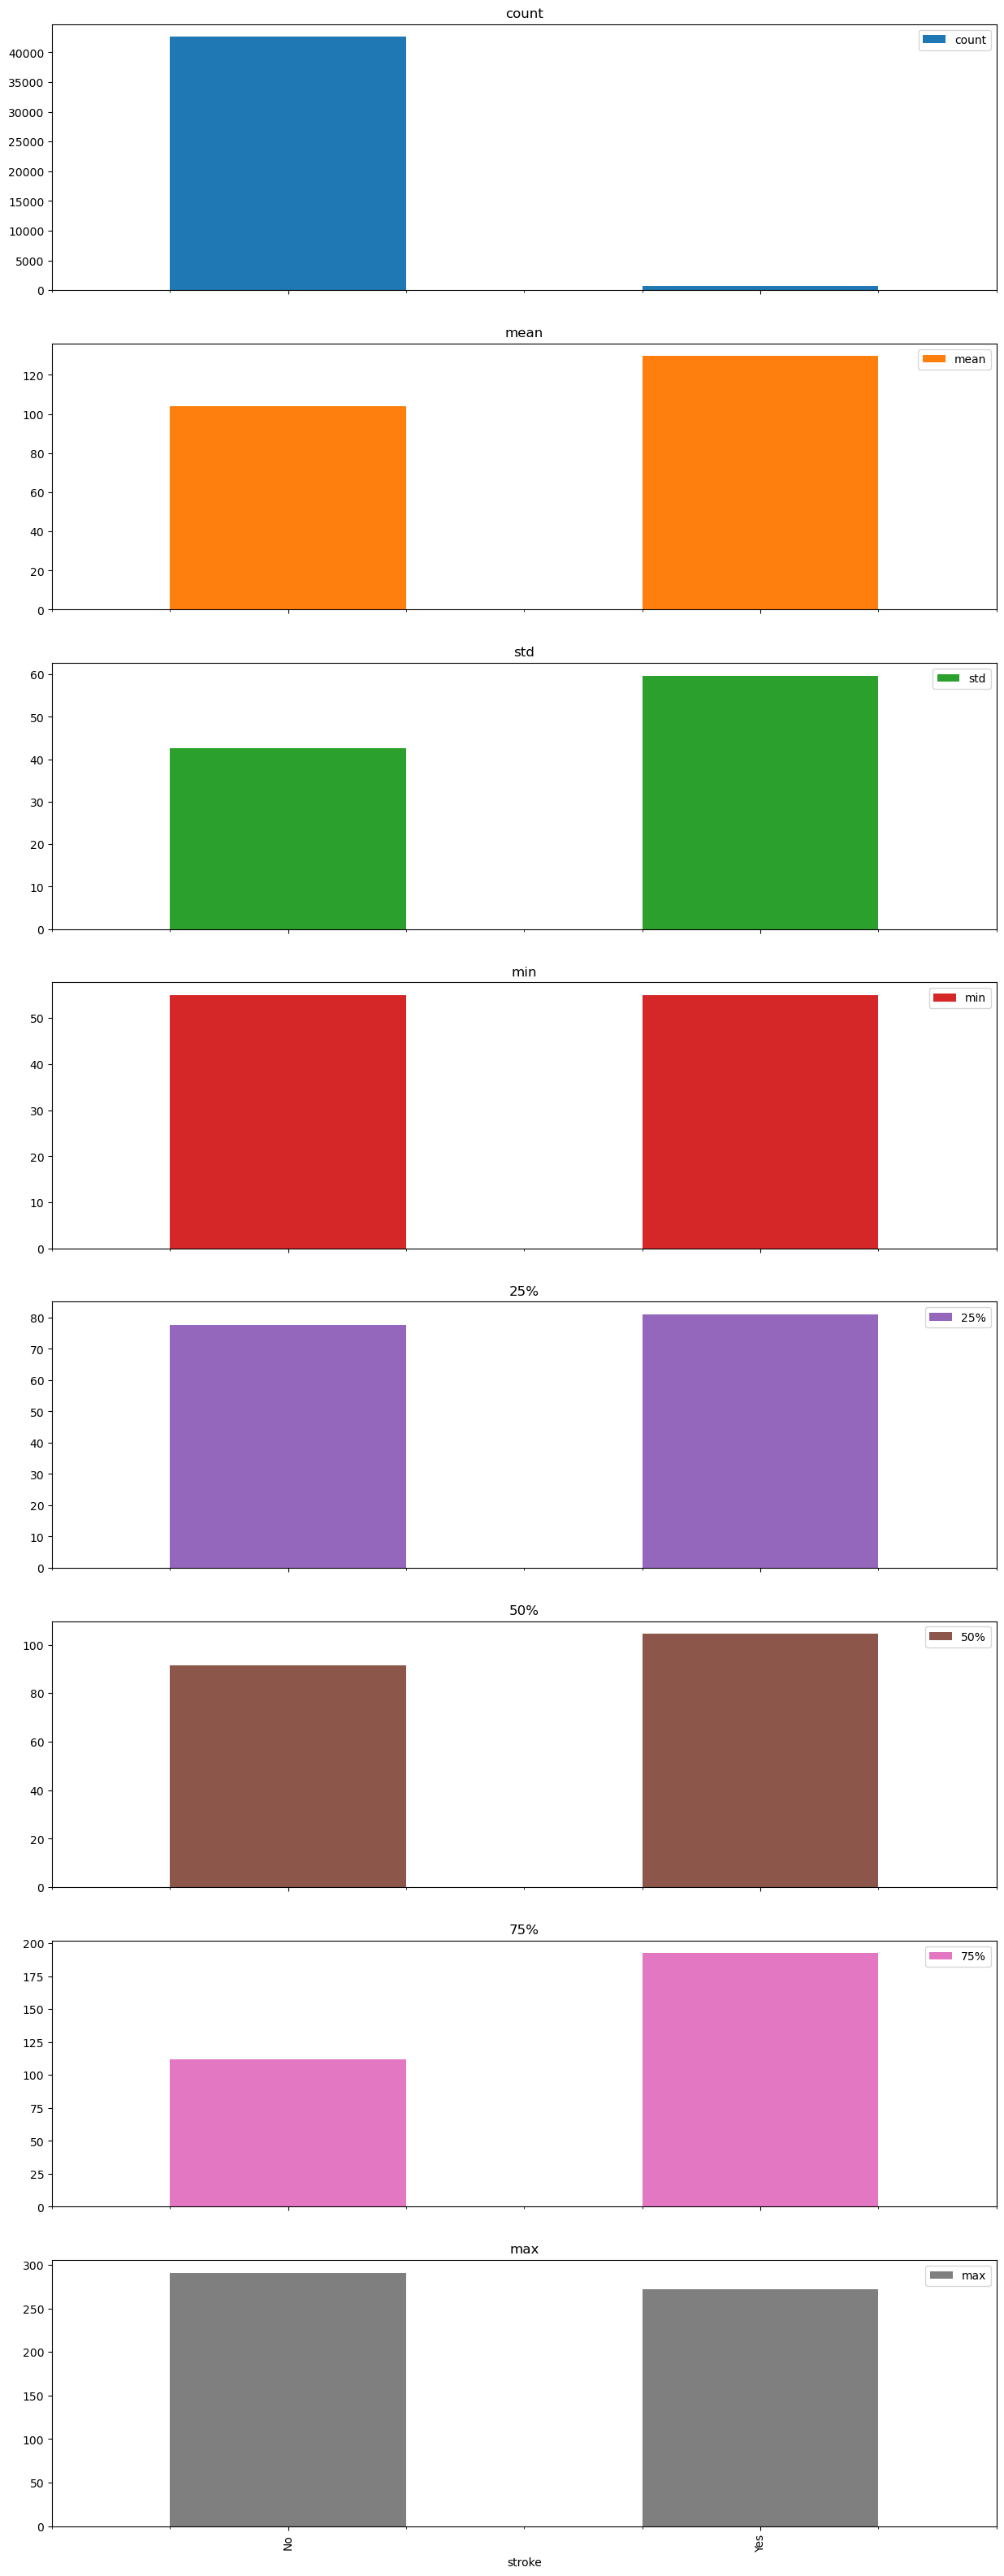

In [69]:
df.groupby("stroke")["avg_glucose_level"].describe().plot(kind="bar",subplots=True,figsize=(15,40))
plt.show()

# Distribution of Glucose level on age

<Axes: xlabel='age', ylabel='avg_glucose_level'>

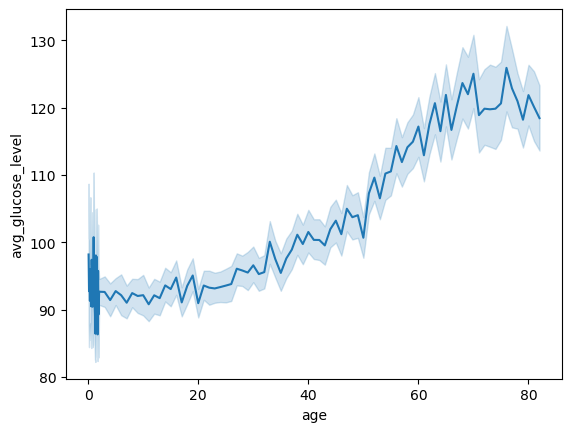

In [70]:
sns.lineplot(data=df,x='age',y='avg_glucose_level')

# Conclusion: Higher the age,having high glucose level.

# ---Type of work on stroke risk?

In [71]:
pd.crosstab(df["work_type"],df["stroke"],margins=True)

stroke,No,Yes,All
work_type,,,
Govt_job,5351,89,5440
Never_worked,177,0,177
Private,24393,441,24834
Self-employed,6542,251,6793
children,6154,2,6156
All,42617,783,43400


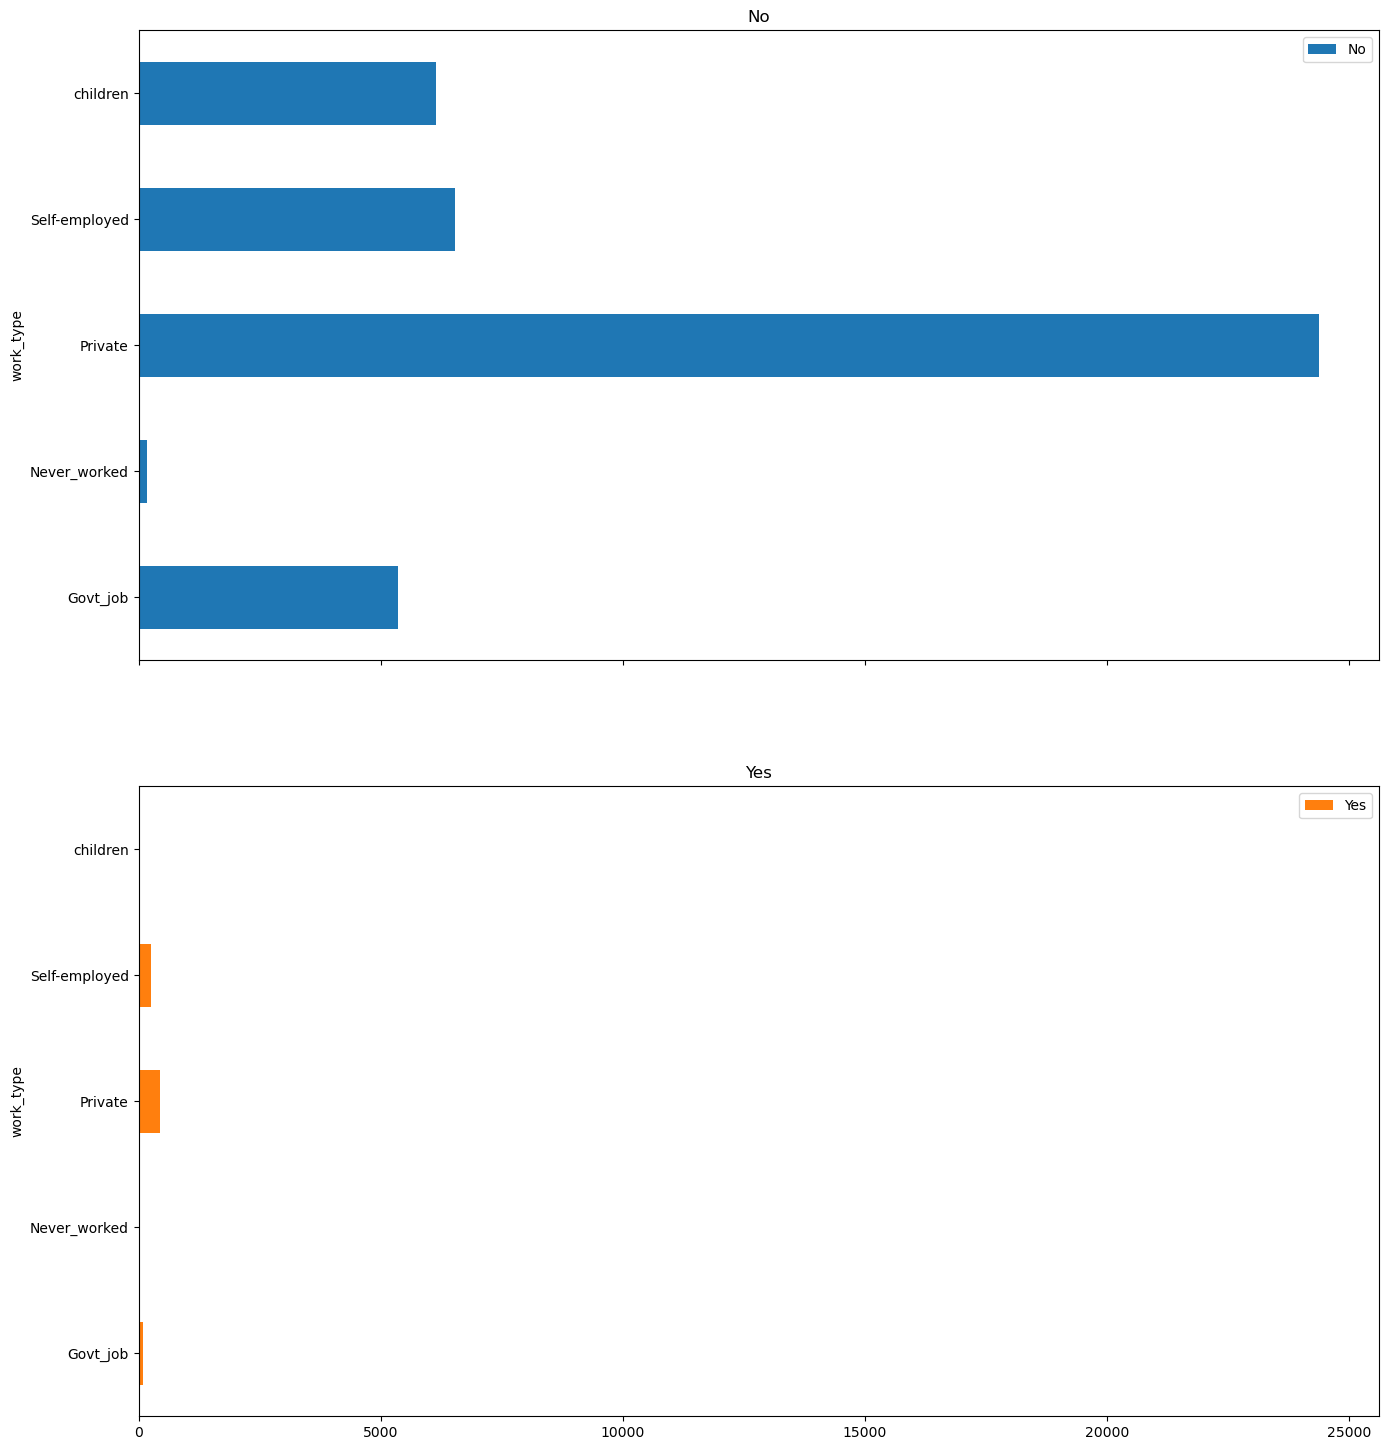

In [72]:
pd.crosstab(df["work_type"],df["stroke"]).plot(kind="barh",subplots=True,figsize=(16,18))
plt.show()

# 

# --Marital status relate to stroke risk

In [73]:
pd.crosstab(df["ever_married"],df["stroke"],margins=True)

stroke,No,Yes,All
ever_married,,,
No,15382,80,15462
Yes,27235,703,27938
All,42617,783,43400


array([<Axes: ylabel='No'>, <Axes: ylabel='Yes'>], dtype=object)

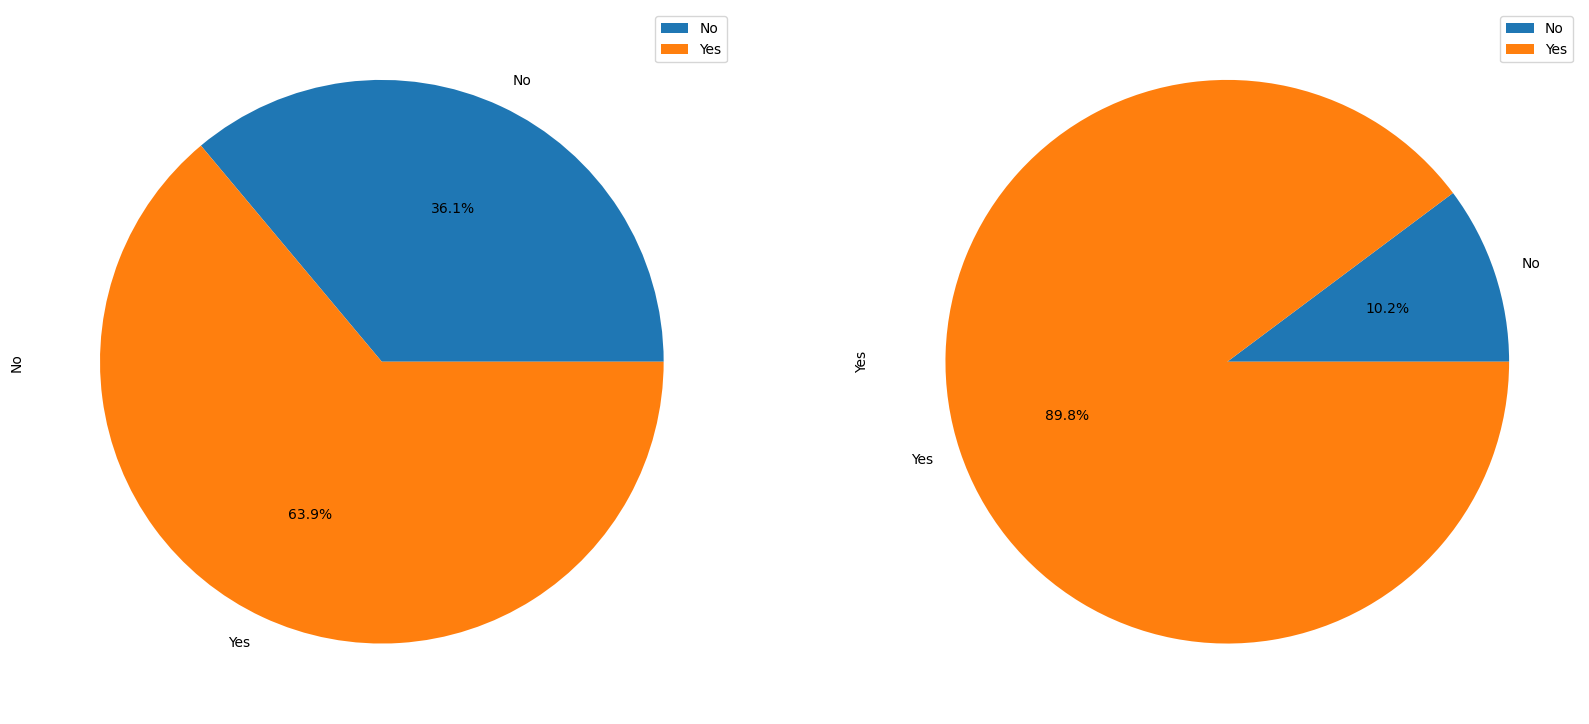

In [74]:
pd.crosstab(df["ever_married"],df["stroke"]).plot(kind="pie",autopct="%0.1f%%",subplots=True,figsize=(20,30))

# Not Married: 80 out of 15,462 have had a stroke.(0.5%)
# Married: 703 out of 27,938 have had a stroke.(2.5%)

# --incidence between residents?


In [75]:
pd.crosstab(df["Residence_type"],df["stroke"],margins=True)

stroke,No,Yes,All
Residence_type,,,
Rural,21260,384,21644
Urban,21357,399,21756
All,42617,783,43400


<Axes: xlabel='Residence_type'>

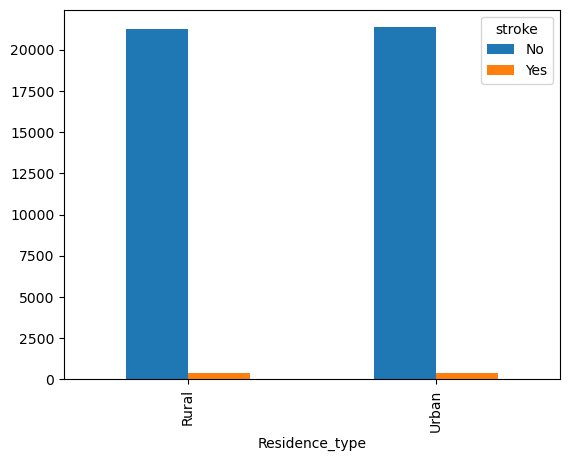

In [76]:
pd.crosstab(df["Residence_type"],df["stroke"]).plot(kind="bar")

In [78]:
df.to_excel("cleaned_stroke_data.xlsx",index=False)